<a href="https://colab.research.google.com/github/Shubhu3108/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Capstone_Project_on_Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

-----------------------------------------------------------------------------
##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**
-----------------------------------------------------------------------------

#**Introduction**

##**What is a Stock?**


### A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.





---


###The dataset of YES BANK has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month of around 185 observations. It contains the following features:

### 1. **Date**: It denotes date of investment done (in our case we have month and year).

### 2. **Open**: The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

### 3. **High**: The high is the highest price at which a stock traded during a period.

### 4. **Low**: The low is the lowest price at which a stock traded during a period.

### 5. **Close**: Close refers to the price of an individual stock when the stock exchange closed for the day.


---


##Importing and Loading data

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore

from sklearn.model_selection import train_test_split


from sklearn.model_selection import GridSearchCV

#Regression Libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

#Model Evaluation 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#Importing 'Yest Bank' Data Set

stock_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Yes Bank Stock Closing Price Prediction- Abhishek Shubham/data_YesBank_StockPrices.csv')

## Exploring Data Frame

In [ ]:
#Checking the top 5 observations
stock_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#Checking botton 5 observations
stock_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
#Exploring the data types of each columns
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


**Findings:**

- There are total 185 records/rows and 5 columns.
- Most columns are of type float and only "Date" Column is of type object.
- We would need to convert the Date column from object to date type.


In [ ]:
# Let's check the summary of numerical features
stock_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
#Shape of DF
stock_df.shape

(185, 5)

In [ ]:
#Checking for null values
stock_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Luckily, there are no null values in our dataset. This save's time and effort to deal with null values separately!

In [ ]:
#Checking for Duplication in our Dataset
len(stock_df[stock_df.duplicated()])


0

There are no duplicate records in our dataset.

In [ ]:
#Convertting Date column from object to date type(Data wrangling)
stock_df['Date']= pd.to_datetime(stock_df['Date'], format= '%b-%y')

In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


The 'Date' column is successfully converted to type 'datetime64'.

#**Exploratory Data Analysis**

##**Univariate Analysis**

<Figure size 576x360 with 0 Axes>

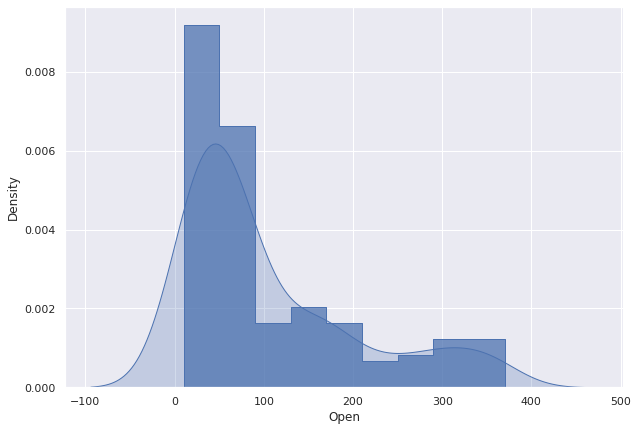

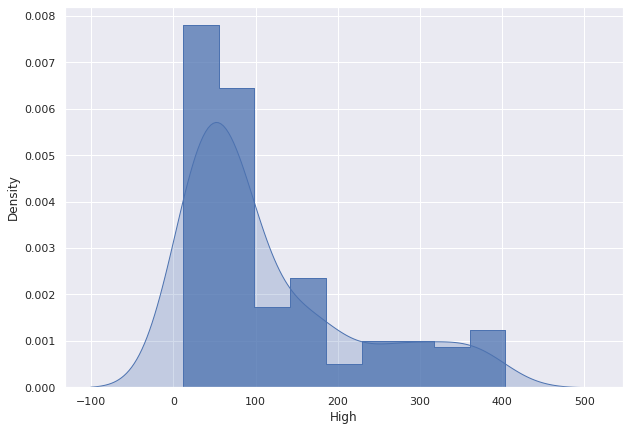

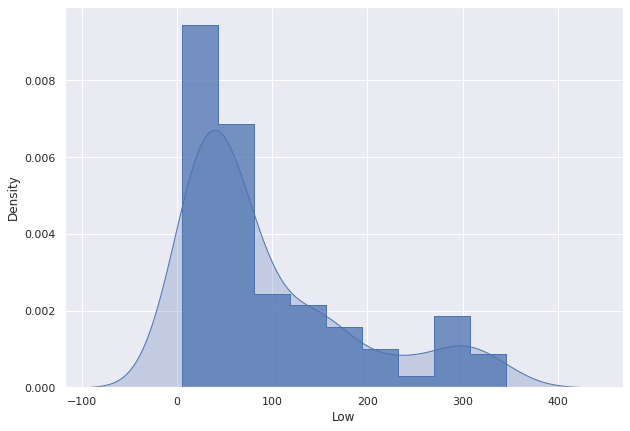

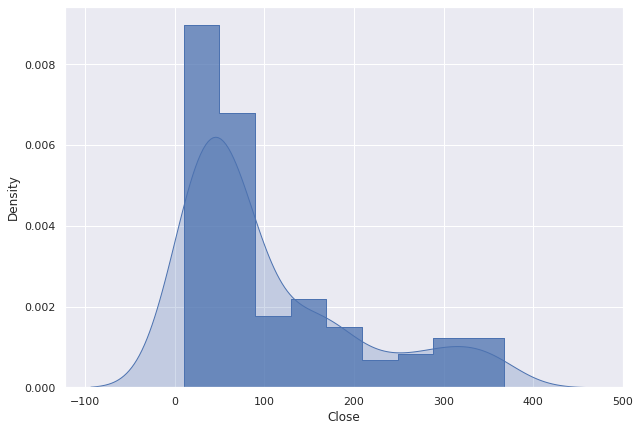

In [ ]:
# Plotting Distributions of all the numerical variables
plt.figure(figsize= [8, 5])
features= list(stock_df.describe().columns)
sns.set(style='darkgrid')
for col in features:
  fig, ax = plt.subplots()
  sns.histplot(stock_df[col], ax= ax, stat= 'density', element= 'step'  )
  sns.kdeplot(stock_df[col], fill= True)
  fig.set_figheight(7)
  fig.set_figwidth(10)

**Findings:**

- All the features are skewed towards right.
- In this case we would need to convert it into normal distribution to get a better accuracy from our model. 

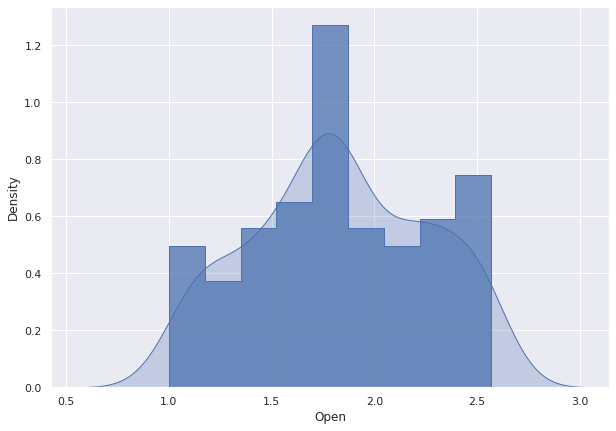

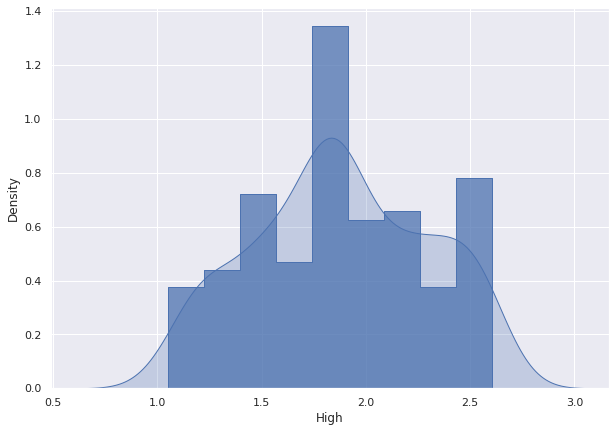

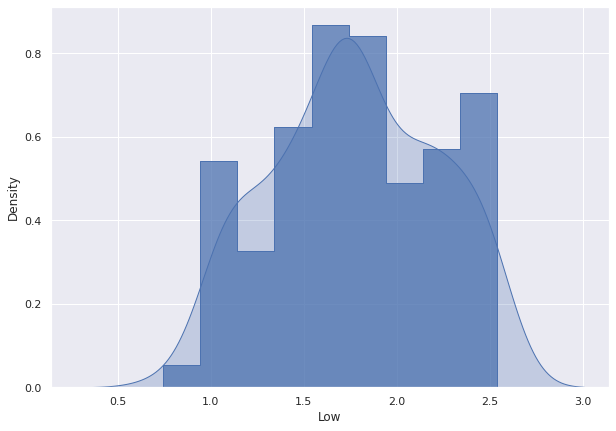

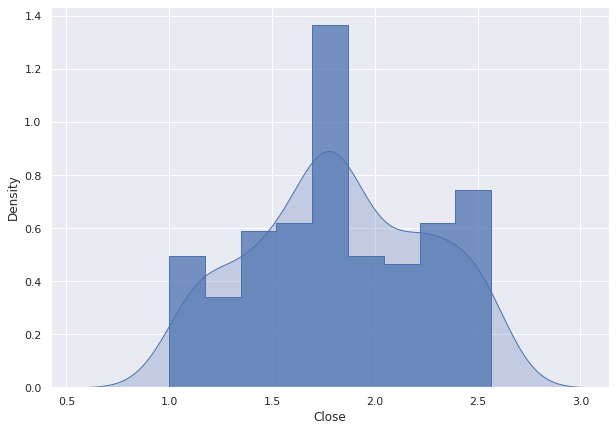

In [ ]:
#Log transformation of all numerial features 
features= list(stock_df.describe().columns)
sns.set(style='darkgrid')
for col in features:
  fig, ax = plt.subplots()
  sns.histplot(np.log10(stock_df[col]), ax= ax, stat= 'density', element= 'step'  )
  sns.kdeplot(np.log10(stock_df[col]), fill= True)
  fig.set_figheight(7)
  fig.set_figwidth(10)

**Findings:**
- After the log transformation the distribution of our Data Set turned into symmetrical.

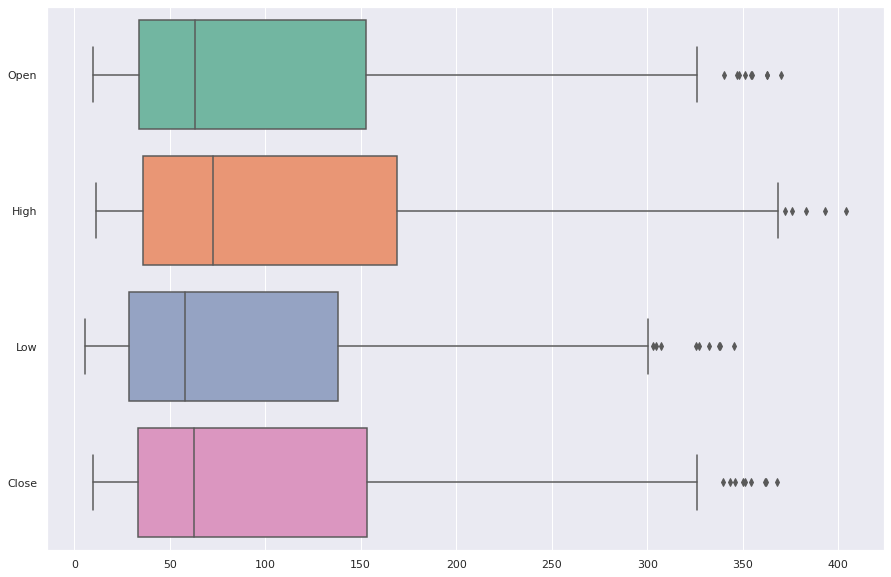

In [ ]:
#Boxplot comparision of all the numerical features
plt.figure(figsize= (15, 10))
sns.boxplot(data=stock_df, orient="h", palette="Set2")

**Findings**:
- All the features has median values between Rs 50 to Rs 80
- There is a presence of outliers in all the features variables
- Feature "High" has median value which is Rs 72.55 

##**Bivariate Analysis**

In [ ]:
stock_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
Yearly_df= stock_df.groupby('Date')['Close'].mean().reset_index()
Yearly_df.head()

,Date,Close
0,2005-07-01,12.46
1,2005-08-01,13.42
2,2005-09-01,13.30
3,2005-10-01,12.99
4,2005-11-01,13.41


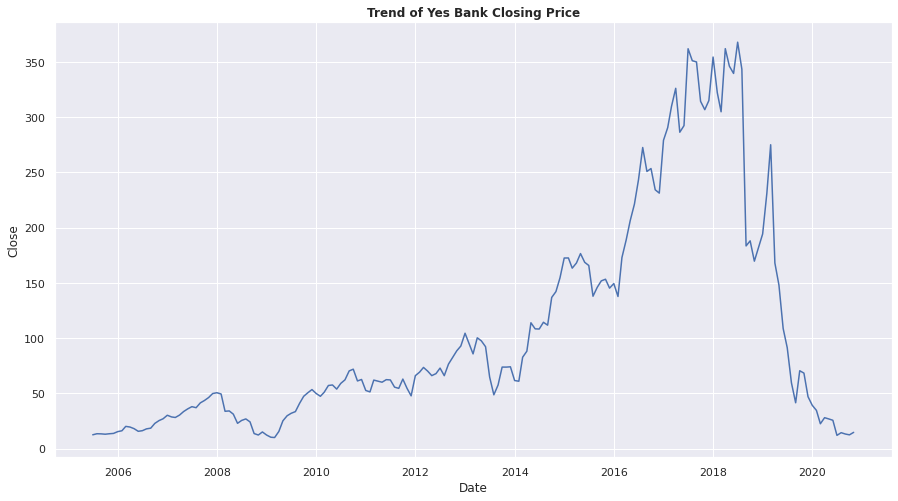

In [ ]:
plt.figure(figsize= [15, 8])
plt.title("Trend of Yes Bank Closing Price", fontweight = 'bold')
sns.lineplot(data=Yearly_df, x= 'Date', y= 'Close', palette= 'husl' )

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severely the Rana Kapoor fraud case affected the price of Yes bank stocks.



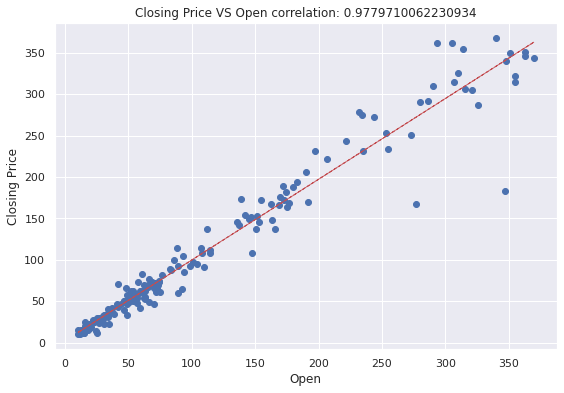

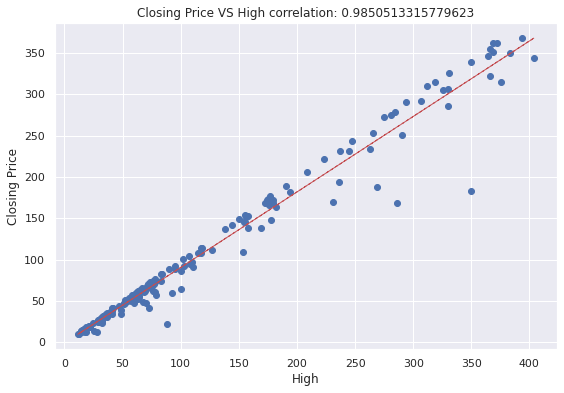

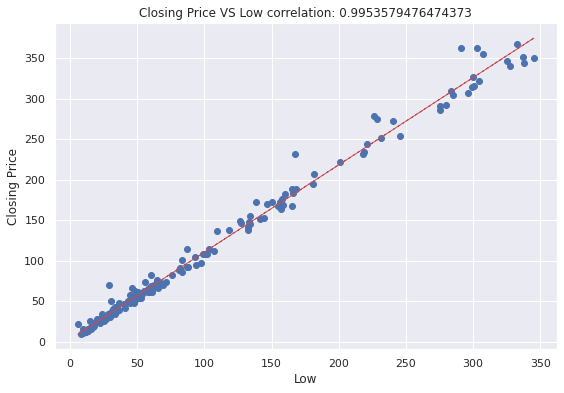

In [ ]:
#Now let's check the relationship of each features with our dependent variable
Independent_variables= list(stock_df.drop('Close', axis= 1).describe().columns)
for col in Independent_variables:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = stock_df[col]
   label = stock_df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Closing Price')
   ax.set_title('Closing Price VS ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(stock_df[col], stock_df['Close'], 1)
   y_hat = np.poly1d(z)(stock_df[col])
 
   plt.plot(stock_df[col], y_hat, "r--", lw=1)
 
plt.show()

**Findings:**

- All independent features have linear relationship with the dependent variable.

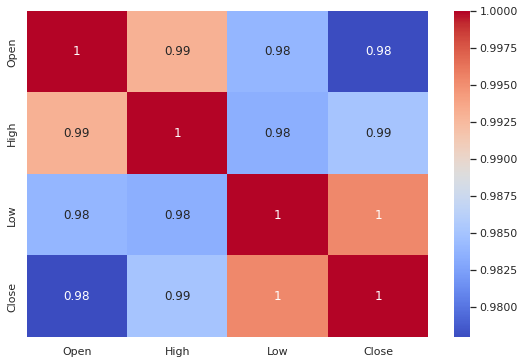

In [ ]:
#Let's get the heatmmap of the Numerical Variables
plt.figure(figsize= (9, 6))
Correlation_matrix= stock_df.corr()
sns.heatmap(Correlation_matrix, annot= True, cmap= 'coolwarm')

**Findings:**

- Looking at the heatmap we can say that all the features are highly correlated. 
- Feature 'Low' has the highest correlation of 1 with the dependent variable.
- There exists multicollinearity between Independent variables which means that we would need to remove one or more features from our dataset during feature selection. 
- Problem due to multicollinearity is that it generates high variance of the estimated coefficients and hence, the coefficient estimates corresponding to those interrelated explanatory variables will not be accurate in giving us the actual picture. They can become very sensitive to small changes in the model.

#**Feature Engineering**

Now we move towards some feature engineering and see what we can implement in our dataset.

In [ ]:
stock_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [ ]:
# Let's create a month and year column from the Date column
stock_df['Month']= stock_df['Date'].dt.month
stock_df['Year']= stock_df['Date'].dt.year


In [ ]:
stock_df.head()

,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


We can see two new columns in our Dataset i.e. 'Month' and 'Year'.

In [ ]:
#Since the Date column cannont be used in our Model so we will convert it as index and drop the column
stock_df.index= stock_df['Date']
stock_df.drop('Date', axis= 1, inplace= True)

In [ ]:
stock_df.head()

,Open,High,Low,Close,Month,Year
Date,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,7,2005
2005-08-01,12.58,14.88,12.55,13.42,8,2005
2005-09-01,13.48,14.87,12.27,13.30,9,2005
2005-10-01,13.20,14.47,12.40,12.99,10,2005
2005-11-01,13.35,13.88,12.88,13.41,11,2005


Now we can see that the 'Date' column is used as an index.

### <b> Let's check how the <code>Shift()</code> function predict Closing price of *Yes Bank* further, we'll test our model with recent dataset.

In [ ]:
# Create a column 'Prediction' and shift 'n' Months for future prediction
future_months = 1
stock_df['Prediction'] = stock_df[['Close']].shift(-future_months)               # Shift() Function shifts index by the desired number of periods
stock_df.head(3)

,Open,High,Low,Close,Month,Year,Prediction
Date,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,7,2005,13.42
2005-08-01,12.58,14.88,12.55,13.42,8,2005,13.30
2005-09-01,13.48,14.87,12.27,13.30,9,2005,12.99


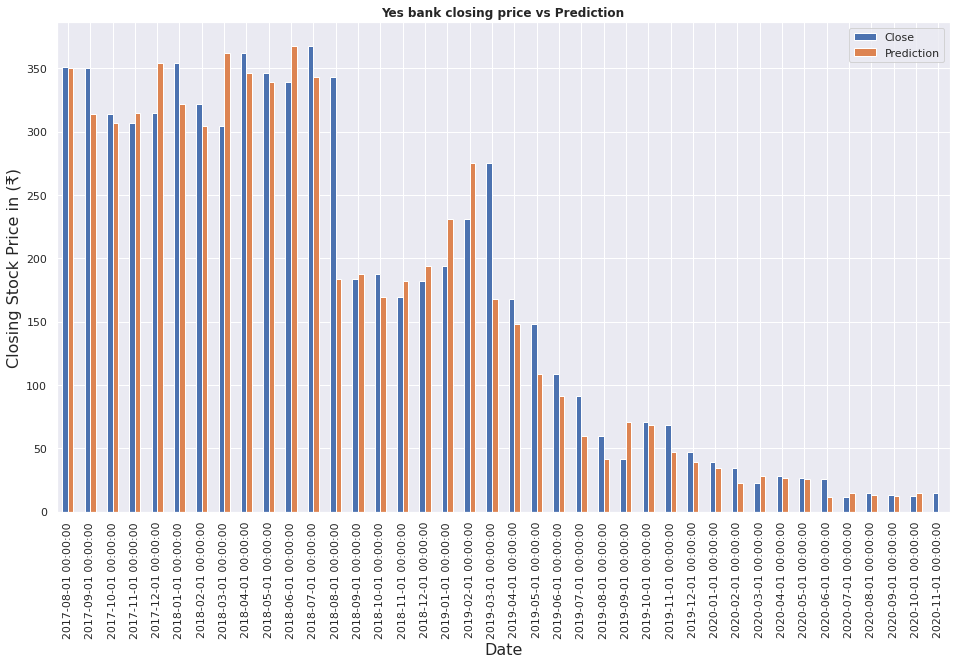

In [ ]:
#Closing price vs prediction
stock_df[['Close','Prediction']].tail(40).plot(kind='bar',figsize=(16,9))                  
plt.grid(True)                                                        
plt.title('Yes bank closing price vs Prediction',fontweight = 'bold')
plt.xlabel('Date',fontsize = 16)
plt.ylabel('Closing Stock Price in (₹)',fontsize = 16)
plt.show()

In [ ]:
# drop prediction field
stock_df.drop('Prediction',axis = 1,inplace = True)

#**Feature Selection**

Now let's test for multicollinearity and select the features which should yield best performance with our model's.

In [ ]:
#Removing Multicollinearity between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  vif = pd.DataFrame()
  vif['Variables']= X.columns
  vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return (vif)

In [ ]:
calc_vif(stock_df[[i for i in stock_df.describe().columns if i not in ['Close', 'Month', 'Year']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Since 'Open' column has the highest VIF so let's drop it first and recheck for VIF again.

In [ ]:
stock_df.drop('Open', axis= 1, inplace= True)

In [ ]:
calc_vif(stock_df[[i for i in stock_df.describe().columns if i not in ['Close', 'Month', 'Year']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


In this case let's drop the **High** column as **Low** is slightly more coorelated with our Dependent Variable **Close**.

In [ ]:
stock_df.drop('High', axis= 1, inplace= True)

In [ ]:
stock_df.head()

,Low,Close,Month,Year
Date,,,,
2005-07-01,11.25,12.46,7,2005
2005-08-01,12.55,13.42,8,2005
2005-09-01,12.27,13.30,9,2005
2005-10-01,12.40,12.99,10,2005
2005-11-01,12.88,13.41,11,2005


After testing for Multicoolinearity with the dependent Variable **Close**, we are left with following independent variables **Low**, **Month**, **Year**

#**One Hot Encoding**

One-hot encoding is the process by which categorical data are converted into numerical data for use in machine learning. Categorical features are turned into binary features that are “one-hot” encoded, meaning that if a feature is represented by that column, it receives a 1. Otherwise, it receives a 0.

**This is perhaps better explained by an image:**

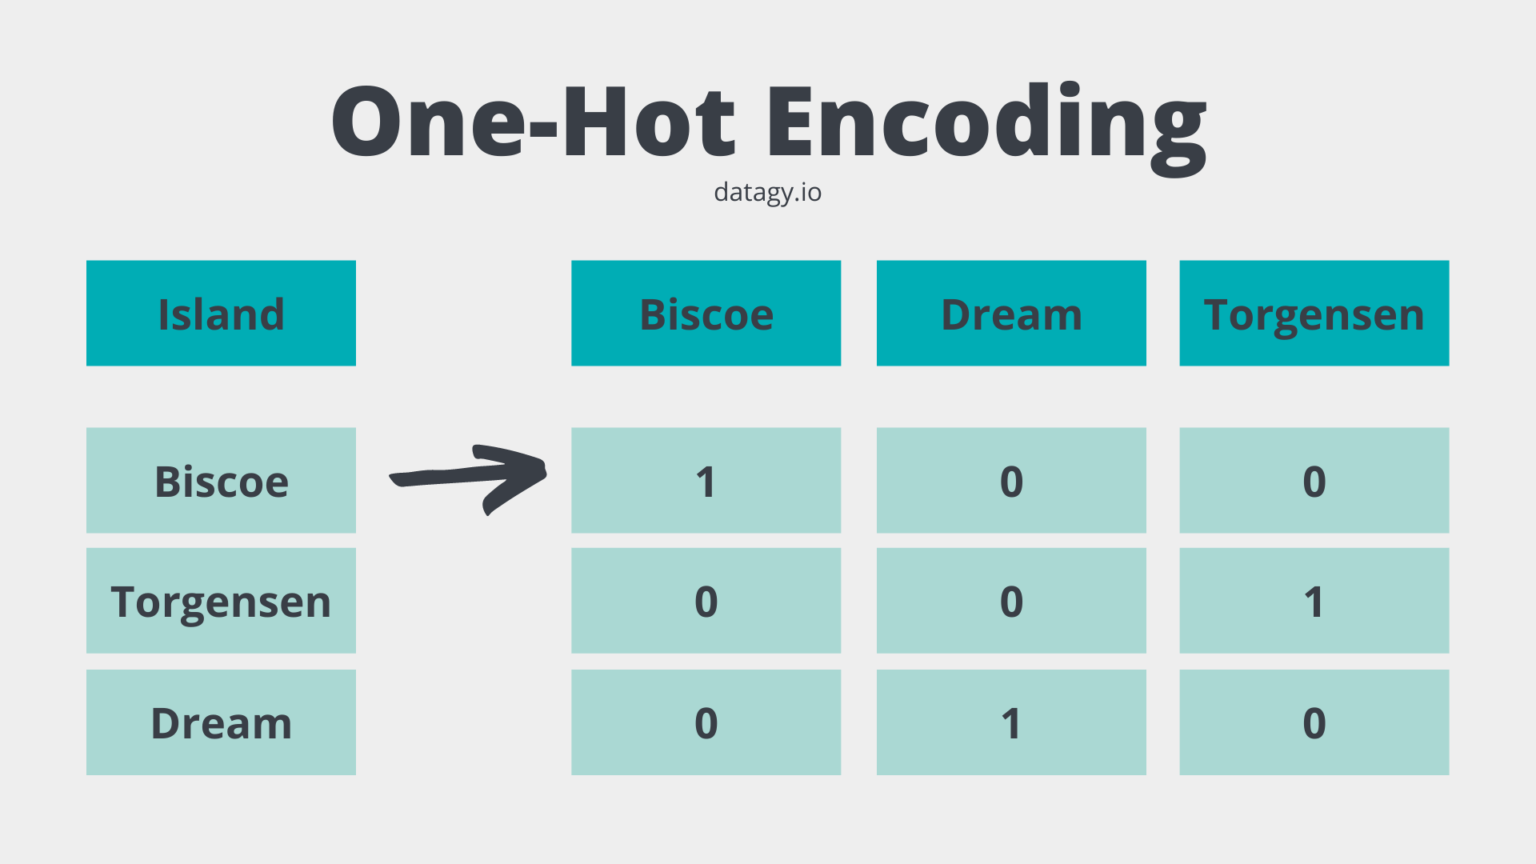

In [ ]:
#One hot encoding of 'Year' column
dataset_pr = pd.get_dummies(stock_df, columns=["Year"])

In [ ]:
dataset_pr.head()

,Low,Close,Month,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,,,
2005-07-01,11.25,12.46,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-08-01,12.55,13.42,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-09-01,12.27,13.30,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-10-01,12.40,12.99,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2005-11-01,12.88,13.41,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Great! After "One Hot Encoding", we can now use the categories in the 'Year' column as seperate independent features for our model.

#**Standardizing the data**

In [ ]:
independent_features= [col for col in dataset_pr if col not in ['Close', 'Month']]
len(independent_features)

17

In [ ]:
#applying zscore to selected independent variables
X = round(dataset_pr[independent_features].apply(zscore),3)

#applying log on dependent variable
y = np.log10(dataset_pr['Close'])

In [ ]:
X.head()

,Low,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020
Date,,,,,,,,,,,,,,,,,
2005-07-01,-0.920,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-08-01,-0.906,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-09-01,-0.909,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-10-01,-0.907,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251
2005-11-01,-0.902,5.462,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.263,-0.251


In [ ]:
y.head()

Date
2005-07-01    1.095518
2005-08-01    1.127753
2005-09-01    1.123852
2005-10-01    1.113609
2005-11-01    1.127429
Name: Close, dtype: float64

#**Train Test Spilit**

In [ ]:
#Spilitting the DataSet into train and test set's

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (148, 17)
X_test:  (37, 17)
y_train:  (148,)
y_test:  (37,)


In [ ]:
#Creating DataFrames of train and test dataset
train_df= pd.DataFrame(X_train,y_train)
test_df= pd.DataFrame(10**y_test)
test_df.rename(columns= {'Close': 'Actual Closing Price'}, inplace= True)
test_df.head()

,Actual Closing Price
Date,
2008-04-01,34.06
2015-12-01,145.23
2019-12-01,46.95
2014-11-01,142.08
2010-08-01,62.22


#**Linear Regression**

In [ ]:
#fitting the data into Linear Regression model
lin_reg= LinearRegression().fit(X_train, y_train)

In [ ]:
lin_reg.score(X_train, y_train)

0.9403650204419233

In [ ]:
lin_reg.intercept_

-58875444889.93402

In [ ]:
lin_reg.coef_

array([3.05309444e-01, 7.90575959e+12, 1.09921214e+13, 1.09921214e+13,
       1.09921214e+13, 1.09921214e+13, 1.09921214e+13, 1.09921214e+13,
       1.09921214e+13, 1.09921214e+13, 1.09921214e+13, 1.09921214e+13,
       1.09921214e+13, 1.09921214e+13, 1.09921214e+13, 1.09921214e+13,
       1.05553484e+13])

In [ ]:
#Predict y_test on the basis of train sets
y_pred = lin_reg.predict(X_test)
print("Printed values of Y: \n",y_pred)

Printed values of Y: 
 [1.41558838 2.13433838 1.83746338 2.10699463 1.79840088 1.53277588
 2.40777588 1.24371338 1.09527588 2.31011963 2.53668213 1.97808838
 2.16949463 1.71246338 2.67730713 2.47027588 1.82965088 1.40386963
 2.25152588 1.75933838 1.33746338 2.02105713 2.14996338 1.77886963
 2.34918213 1.79840088 2.45074463 1.09527588 2.00152588 1.69293213
 2.71636963 2.46636963 1.87652588 2.21246338 1.55621338 1.75152588
 2.49371338]


In [ ]:
def evaluation_metrics(data):
  MSE = mean_squared_error(y_test,data)
  RMSE = np.sqrt(MSE)
  r2 = r2_score(y_test,data)
  adjusted_r2 = 1-(1-r2_score(y_test,data))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("The model performance for test set:")
  print("--------------------------------------")
  print("Mean Squared Error: ",MSE)
  print("Root Mean Squared Error: ",RMSE)
  print("R2: ",r2)
  print("Adjusted R2: ",adjusted_r2)
  return

In [ ]:
#Checking model Performance using different evaluation metrics for Linear Regression Model
evaluation_metrics(y_pred)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.008378716531125619
Root Mean Squared Error:  0.09153532941507131
R2:  0.9550214108859424
Adjusted R2:  0.9147774100996803


In [ ]:
test_df['LR Predicted Closing Price'] = 10**y_pred
test_df.head()

,Actual Closing Price,LR Predicted Closing Price
Date,,
2008-04-01,34.06,26.036846
2015-12-01,145.23,136.250586
2019-12-01,46.95,68.780191
2014-11-01,142.08,127.936548
2010-08-01,62.22,62.863836


In [ ]:
#Mean Absolute Error
MAE  = mean_absolute_percentage_error

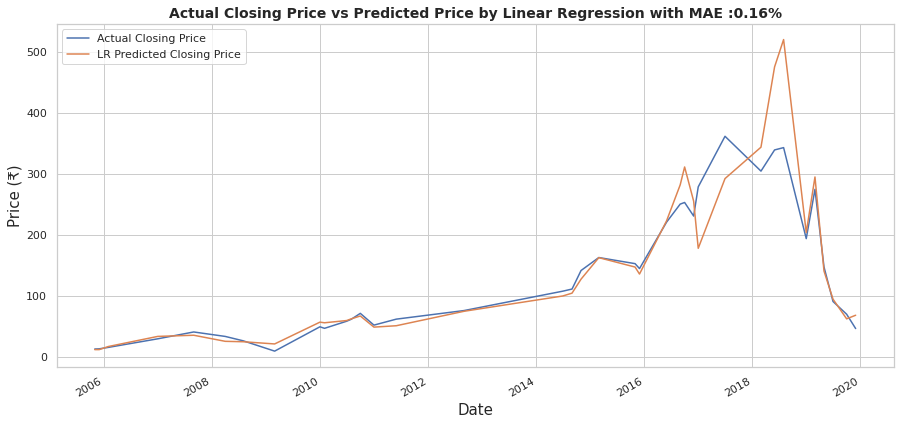

In [ ]:
#Graph between Actual Close price and Predicted Price
sns.set(style='whitegrid')
test_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by Linear Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

#**Lasso Regression**

In [ ]:
lasso_reg= Lasso(alpha=0.001)

In [ ]:
#Fitting the Data
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
lasso_reg.score(X_train, y_train)

0.9456881756779446

In [ ]:
l_y_pred= lasso_reg.predict(X_test)

In [ ]:
#Checking model Performance using different evaluation metrics for Lasso Regression Model
evaluation_metrics(l_y_pred)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009379605869086021
Root Mean Squared Error:  0.09684836534028864
R2:  0.9496484411579983
Adjusted R2:  0.9045970464046283


### Applying Cross Validation & Hyperparameter tuning on Lasso Regression

In [ ]:
# Cross Validation 
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014 ]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print( "The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -0.01263071552015855


In [ ]:
y_pred_lasso= lasso_regressor.predict(X_test)

In [ ]:
#Getting evaluation metrics for Lasso CV
evaluation_metrics(y_pred_lasso)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009376701436556797
Root Mean Squared Error:  0.09683336943717696
R2:  0.9496640327198869
Adjusted R2:  0.9046265883113646


In [ ]:
# Data frame for Actual closing price and Lasso Predicted Closing Price 
test_df['Lasso Predicted Closing Price']= 10**y_pred_lasso
lasso_df= test_df.loc[:, ['Actual Closing Price', 'Lasso Predicted Closing Price']]
lasso_df.head()

,Actual Closing Price,Lasso Predicted Closing Price
Date,,
2008-04-01,34.06,26.365934
2015-12-01,145.23,144.313848
2019-12-01,46.95,59.849779
2014-11-01,142.08,135.358269
2010-08-01,62.22,60.649159


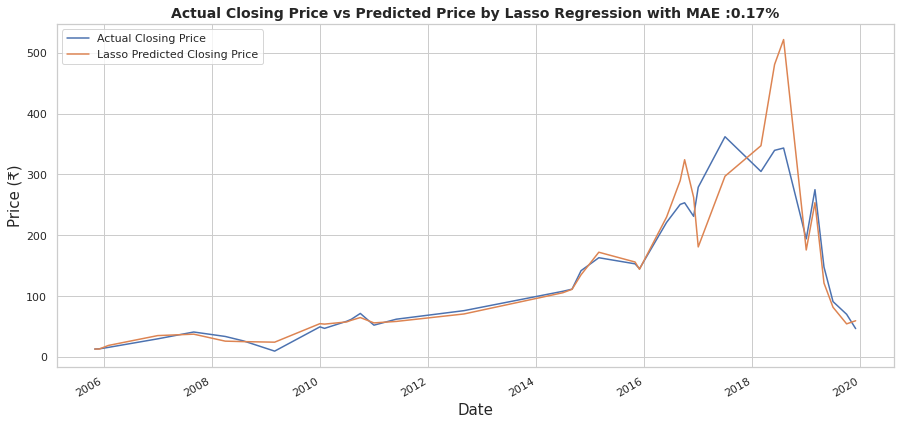

In [ ]:
#Graph between Actual Close price and Lasso Regression Predicted Price
lasso_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by Lasso Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_lasso)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

#**Ridge Regression**

In [ ]:
#Fitting the data into Ridge regression model
ridge_reg= Ridge(alpha= 0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
ridge_reg.score(X_train, y_train)

0.9457766805321504

In [ ]:
y_pred_r= ridge_reg.predict(X_test)

In [ ]:
#Getting evaluation metrics for Ridge regression
evaluation_metrics(y_pred_r)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009365359873489867
Root Mean Squared Error:  0.0967747894520565
R2:  0.9497249164487018
Adjusted R2:  0.9047419469554351


### Applying Cross Validation & Hyperparameter tuning on Ridge Regression

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 4, 5, 10, 20, 30, 40, 45, 50,
                                   55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print( "The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 3}

Using  {'alpha': 3}  the negative mean squared error is:  -0.012538304166010358


In [ ]:
y_pred_ridge= ridge_regressor.predict(X_test)

In [ ]:
#Getting evaluation metrics for Ridge regression CV
evaluation_metrics(y_pred_ridge)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.008847513525776934
Root Mean Squared Error:  0.09406122222136461
R2:  0.9525048169276678
Adjusted R2:  0.9100091268103179


In [ ]:
# Data frame for Actual closing price and Ridge Predicted Closing Price 
test_df['Ridge Predicted Closing Price']= 10**y_pred_ridge
ridge_df= test_df.loc[:, ['Actual Closing Price', 'Ridge Predicted Closing Price']]
ridge_df.head()

,Actual Closing Price,Ridge Predicted Closing Price
Date,,
2008-04-01,34.06,26.142190
2015-12-01,145.23,146.673951
2019-12-01,46.95,64.154295
2014-11-01,142.08,129.931358
2010-08-01,62.22,60.731005


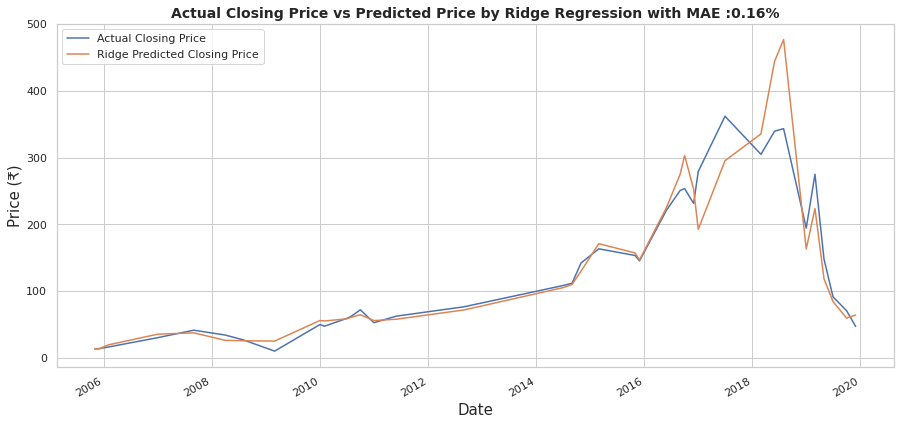

In [ ]:
#Graph between Actual Close price and Ridge Regression Predicted Price
ridge_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by Ridge Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_ridge)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

#**Elastic Net Regression**

In [ ]:
#Fitting the Data into ElasticeNet model
elasticnet_reg = ElasticNet(alpha= 0.01)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [ ]:
elasticnet_reg.score(X_train, y_train)

0.9437158786955572

In [ ]:
y_pred_e= elasticnet_reg.predict(X_test)

In [ ]:
#Getting evaluation metrics for ElasticNet regression model
evaluation_metrics(y_pred_e)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009333548588491178
Root Mean Squared Error:  0.09661029235278805
R2:  0.9498956856484749
Adjusted R2:  0.905065509649742


### Applying Cross Validation & Hyperparameter tuning on ElasticNet Regression

In [ ]:
#ElasticNet Hyperparameter tuning
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,40,45,50],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 40, 45, 50],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best fit value :" ,elastic_regressor.best_params_)
print("\nBy Using ",elastic_regressor.best_params_, " Negative mean squared error is: ", elastic_regressor.best_score_)

Best fit value : {'alpha': 0.01, 'l1_ratio': 0.3}

By Using  {'alpha': 0.01, 'l1_ratio': 0.3}  Negative mean squared error is:  -0.01233335084816529


In [ ]:
y_pred_elastic= elastic_regressor.predict(X_test)

In [ ]:
#Getting Evaluation metrics for ElasticNet after applying Cross-Validation
evaluation_metrics(y_pred_elastic)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.009096377849834535
Root Mean Squared Error:  0.09537493302663198
R2:  0.9511688645612937
Adjusted R2:  0.9074778486424512


In [ ]:
# Data frame for Actual closing price and ElastictNet Predicted Closing Price 
test_df['ElasticNet Predicted Closing Price']= 10**y_pred_elastic
elasticnet_df= test_df.loc[:, ['Actual Closing Price', 'ElasticNet Predicted Closing Price']]
elasticnet_df.head()

,Actual Closing Price,ElasticNet Predicted Closing Price
Date,,
2008-04-01,34.06,26.763841
2015-12-01,145.23,142.542580
2019-12-01,46.95,59.677823
2014-11-01,142.08,130.999880
2010-08-01,62.22,60.162559


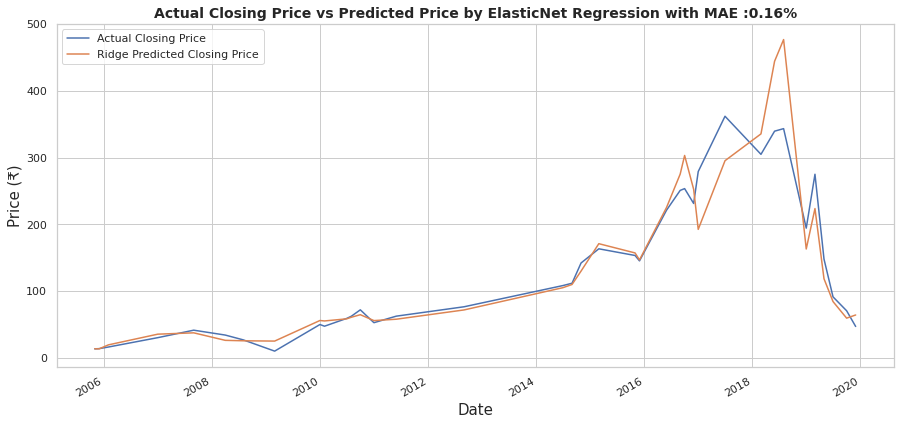

In [ ]:
#Graph between Actual Close price and ElastictNet Regression Predicted Price
ridge_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by ElasticNet Regression with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_elastic)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

#**K-nearest Neighbour**

In [ ]:
#Fitting the data into Knn model
knn= KNeighborsRegressor(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn.score(X_train, y_train)

0.9718836129506391

In [ ]:
y_pred_k= knn.predict(X_test)

In [ ]:
#Getting Evaluation metrics for Knn model
evaluation_metrics(y_pred_k)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.010298708949509664
Root Mean Squared Error:  0.10148255490235582
R2:  0.9447145160569081
Adjusted R2:  0.895248556739405


### Applying Cross Validation & Hyperparameter tuning on K-nearest Neighbour Algorithm

In [ ]:
#Hyperparameter tuning
param_grid = {'n_neighbors':np.arange(1,50)}
# Implement KNR with CV
knn = KNeighborsRegressor()
# no. of cv=10
knn_cv= GridSearchCV(knn,param_grid,cv=10)
# Fit the model
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
print("The best fit alpha value is found out to be :" ,knn_cv.best_params_)
print("\nUsing ",knn_cv.best_params_, " the negative mean squared error is: ", knn_cv.best_score_)

The best fit alpha value is found out to be : {'n_neighbors': 2}

Using  {'n_neighbors': 2}  the negative mean squared error is:  0.9659221416552827


In [ ]:
y_pred_knn= knn_cv.predict(X_test)

In [ ]:
#Getting Evaluation metrics for Knn model after applying Cross-Validation
evaluation_metrics(y_pred_knn)

The model performance for test set:
--------------------------------------
Mean Squared Error:  0.002445463875291349
Root Mean Squared Error:  0.0494516316747117
R2:  0.986872271614466
Adjusted R2:  0.9751264093747777


In [ ]:
test_df['Knn Predicted Closing Price']= 10**y_pred_knn
knn_df= test_df.loc[:, ['Actual Closing Price', 'Knn Predicted Closing Price']]
knn_df.head()

,Actual Closing Price,Knn Predicted Closing Price
Date,,
2008-04-01,34.06,39.664974
2015-12-01,145.23,148.840769
2019-12-01,46.95,49.661605
2014-11-01,142.08,145.429753
2010-08-01,62.22,65.597736


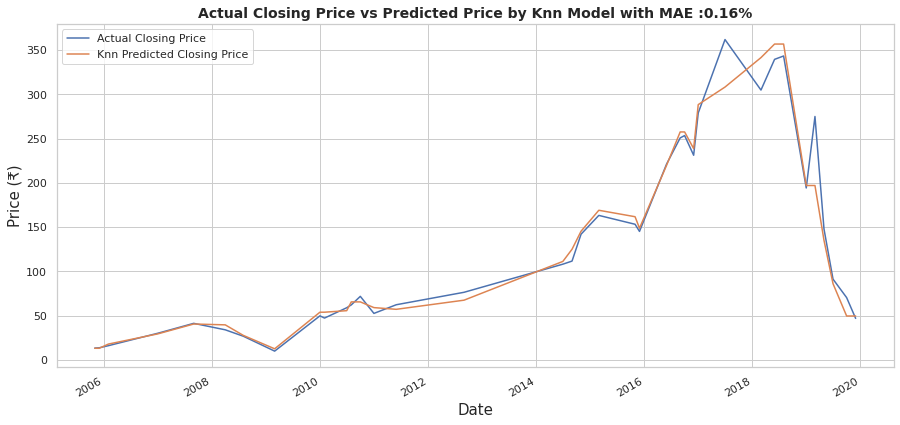

In [ ]:
#Graph between Actual Close price and Knn Regression Predicted Price
knn_df.plot(figsize = (15,7))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Price (₹)',fontsize = 15)
plt.title('Actual Closing Price vs Predicted Price by Knn Model with MAE :{:.2f}%'.format(MAE(10**y_test,10**y_pred_elastic)),fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

#**Model Comparision Matrix**

In [ ]:
#Comparison between algorithms 
accuracy_list = ['MSE','RMSE',"R2","Adjusted_R2"]
reg_models = [lin_reg,lasso_regressor,ridge_regressor,elastic_regressor, knn_cv]

def error_matrix(Y):
  MSE = mean_squared_error(y_test,Y)
  RMSE = np.sqrt(MSE)
  r_2 = r2_score(y_test,Y)
  adj_r2 = 1-(1-r2_score(y_test,Y))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))

  return MSE,RMSE,r_2,adj_r2



comparision_df = pd.DataFrame(index = accuracy_list)
comparision_df['Linear Regression'] = error_matrix(y_pred)
comparision_df['Lasso'] = error_matrix(y_pred_lasso)
comparision_df['Ridge'] = error_matrix(y_pred_ridge)
comparision_df['ElasticNet'] = error_matrix(y_pred_elastic)
comparision_df['Knn']= error_matrix(y_pred_knn)
comparision_df

,Linear Regression,Lasso,Ridge,ElasticNet,Knn
MSE,0.008379,0.009377,0.008848,0.009096,0.002445
RMSE,0.091535,0.096833,0.094061,0.095375,0.049452
R2,0.955021,0.949664,0.952505,0.951169,0.986872
Adjusted_R2,0.914777,0.904627,0.910009,0.907478,0.975126


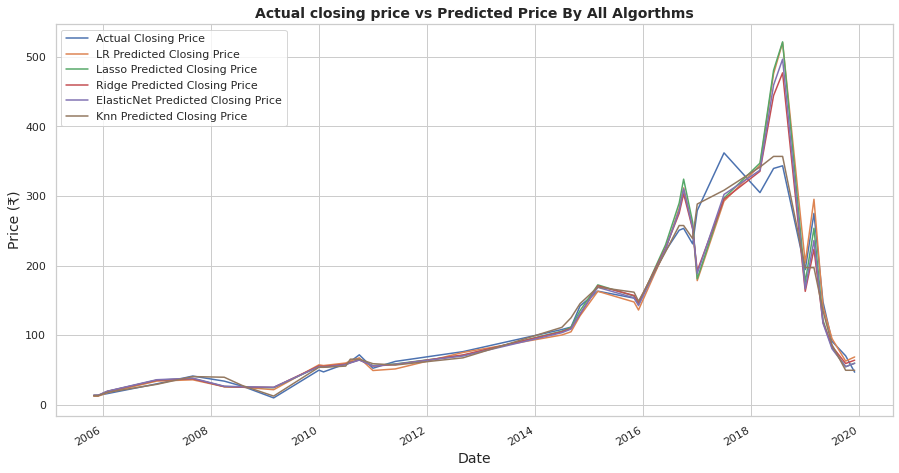

In [ ]:
test_df.plot(figsize= [15,8])
plt.grid(True)
plt.xlabel('Date',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price By All Algorthms',fontweight = 'bold',fontsize = 14)
plt.legend()
plt.show()

#**Conclusion**

* Target Variable is strongly correlated with all independent features.

* Low feature has the highest correlation with the dependent Variable.

* K-nearest Neighbours and Linear Regression model has better performance with R2 score of 0.986872 and 0.955021 respectively.

* With Cross Validation the performance of Lasso, Ridge and ElasticNet regression models has improved gradually by selecting the best hyperparameter for these models.